## Global setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from import_data import *
from utils import *
from recuit_simule import *

In [2]:
prefix = '../Data/'

In [3]:
cust_file = '2_detail_table_customers.xls'
df_custs = pd.read_excel(prefix + cust_file)

In [4]:
vehicles_file = '3_detail_table_vehicles.xls'
df_vehicles = pd.read_excel(prefix + vehicles_file)

In [5]:
depots_file = '4_detail_table_depots.xls'
df_depots = pd.read_excel(prefix + depots_file)

depot_lat = df_depots['DEPOT_LATITUDE'][0]
depot_long = df_depots['DEPOT_LONGITUDE'][0]

In [6]:
constraints_file = '5_detail_table_constraints_sdvrp.xls'
df_constraints = pd.read_excel(prefix + constraints_file)

In [7]:
custs_depots_distances_file = '6_detail_table_cust_depots_distances.xls'
df_custDepotsDistances = pd.read_excel(prefix + custs_depots_distances_file)

### Génération d'une solution initiale

In [8]:
data = coordinates(cust_file, depots_file)
coord_dict = coord_to_dict(data)

vehicle_capacity = 50
n_vehicules = (len(data) - 1)//vehicle_capacity + 1

s_init = gen_init_sol(cust_file, depots_file, vehicle_capacity)

### Tabou algorithm

### Recuit algorithm

In [9]:
nb_iter = 100
temp_i = 10
cooling_coeff = 0.8

sol_RS = recuit_simule(s_init, coord_dict, temp_i, nb_iter, cooling_coeff)

In [10]:
print(sol_RS[1])

[[     0 136683 920420   1075 921872 922121 921302 133682    739    307
  131252 139927   1973   7929 922169 920697 922888 136836 131334    204
  140167 139822 139172 921560 920296 131248 131474 921663 131532 140401
  137731 139112   1017 137601 922468 135887 131768  15204 922111  15247
    1564   1644 921231   1584 136590 137665    387 137635  15253 133290
  138199      0]
 [     0  15208 131247 137637 136347 131249 139661 142598 922863   7634
  141548 138277 920300 133395 136700 144835 142135  15210 923275    593
  140563    740 922137 141898 131280 139542 921194 921195 923817 922848
   15028 136524    441   1408 140805 922202   1684 142634 138253   1886
    1149 923589 131460   1243   1436 133685 132580    156 142542 131297
  139534      0]
 [     0 139148 134143 923762   7522    884 923845   1648    506   1096
  920619 921437    547   1717   1687   1518 921127 134004 145240 136510
  920456 131250 133291 138020 138622 144414 921709 143637   7935    326
  923142    838 140062 131279 

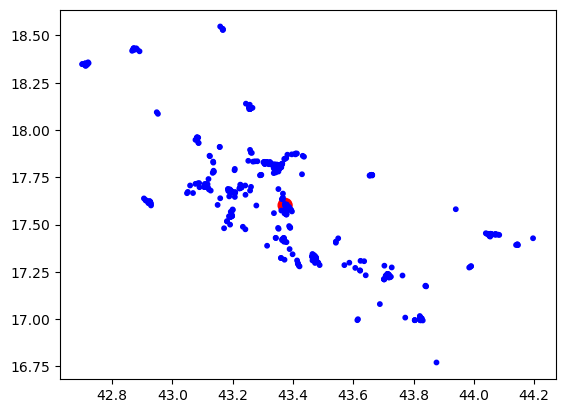

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
code, lat, lon = extract_file_info(cust_file, depots_file)
visualize_cycles(sol_RS[1], lat, lon, coord_dict)

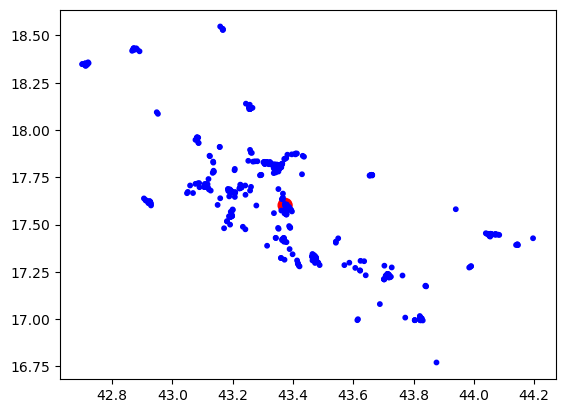

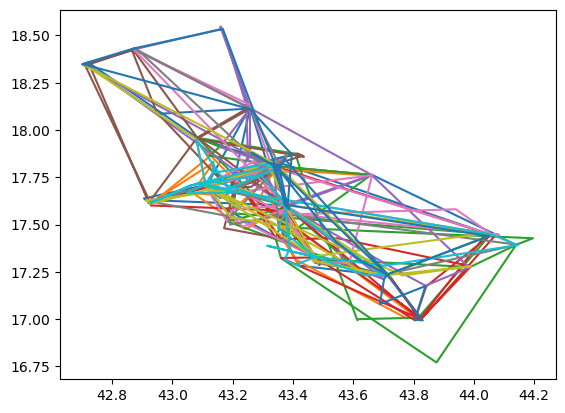

In [12]:
lat, long = extract_file_info(cust_file, depots_file)[1:]
visualize_coordinates(lat, long)

X = [] 
Y = []
for cycle in sol_RS[1]:
    for code in cycle:
        lat, long = find_coords_from_code(code, coord_dict)
        X.append(lat)
        Y.append(long)

    plt.plot(X, Y)
    X = []
    Y = []

plt.show()

Le code suivant permet de constater gen_init_sol ne génère pas toujours le bon nombre de clients, il devrait y en avoir au total 573. <br>

In [ ]:
print(sol_RS[0])

clients_code_df = df_custs['CUSTOMER_CODE'].drop_duplicates().sort_values()

print()

test_sol = gen_init_sol(cust_file, depots_file, vehicle_capacity)
test_set = set()
for cycle in test_sol:
    for client in cycle:
        test_set.add(client)
test_set = sorted(test_set)  

print(test_set)
print(list(clients_code_df))

print(len(test_set))
print(len(clients_code_df))

5814.850307293347

[0, 9, 26, 27, 118, 156, 168, 204, 219, 239, 285, 307, 320, 326, 352, 359, 360, 371, 387, 398, 414, 441, 454, 478, 494, 499, 506, 526, 532, 547, 586, 587, 593, 598, 606, 738, 739, 740, 742, 743, 744, 760, 775, 838, 871, 882, 883, 884, 938, 957, 969, 974, 990, 992, 1007, 1016, 1017, 1031, 1044, 1047, 1048, 1065, 1071, 1072, 1075, 1077, 1078, 1079, 1080, 1082, 1084, 1089, 1096, 1097, 1112, 1118, 1149, 1173, 1178, 1186, 1193, 1199, 1243, 1281, 1324, 1346, 1353, 1356, 1374, 1381, 1387, 1405, 1408, 1418, 1425, 1436, 1439, 1480, 1487, 1518, 1534, 1539, 1540, 1564, 1584, 1587, 1619, 1644, 1648, 1651, 1653, 1654, 1656, 1657, 1664, 1665, 1667, 1676, 1684, 1686, 1687, 1709, 1717, 1747, 1748, 1760, 1774, 1782, 1805, 1862, 1886, 1892, 1934, 1938, 1973, 1998, 2038, 2091, 2198, 7521, 7522, 7525, 7528, 7552, 7572, 7585, 7634, 7741, 7779, 7896, 7929, 7930, 7935, 7945, 7959, 7982, 10538, 10564, 10703, 10706, 10813, 10821, 10825, 15020, 15021, 15022, 15025, 15026, 15027, 15028, 15030,

### Genetic algorithm